# IMPORT LIBRARIES

In [1]:
import pandas as pd
from scipy import stats
import BiQ_Common_Fxns as BiQ
import pandas as pd
from scipy import stats
from tkinter import filedialog, Tk, simpledialog
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np

# EXTRACT DATA AND PERFORM TEST

Columns in Excel sheet:
Index(['X', 'Y'], dtype='object')

t-test results:
t-statistic: 1.2980791530819826
p-value: 0.19737018635061013
Degrees of Freedom: 96
Fail to reject the null hypothesis: There is no significant difference between the groups.

X:
Mean: 11.918
Standard Deviation: 5.958
SE Mean: 0.851
95% Confidence Interval: (10.250234658371507, 13.586500035506045)

Y:
Mean: 10.408
Standard Deviation: 5.552
SE Mean: 0.793
95% Confidence Interval: (8.853471441610292, 11.962855089001952)


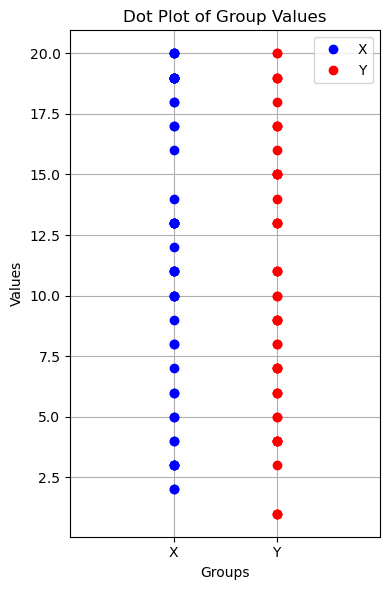

In [2]:
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def calculate_stats(data):
    """Calculates mean, std dev, SE, and confidence interval."""
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use ddof=1 for sample std dev
    se = std_dev / np.sqrt(len(data))
    # Calculate 95% confidence interval
    margin_error = 1.96 * se  # 1.96 for 95% CI
    conf_interval = (mean - margin_error, mean + margin_error)
    return mean, std_dev, se, conf_interval

def perform_t_test(group1, group2, group1_name, group2_name, equal_var=True):
    """Performs a two-sample t-test and plots dot plots."""
    try:
        # Calculate statistics for each group
        mean1, std_dev1, se1, conf_interval1 = calculate_stats(group1)
        mean2, std_dev2, se2, conf_interval2 = calculate_stats(group2)

        # Perform two-sample t-test
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=equal_var)

        # Print results
        print("\nt-test results:")
        print(f"t-statistic: {t_stat}")
        print(f"p-value: {p_value}")
        print(f"Degrees of Freedom: {len(group1) + len(group2) - 2}")

        # Interpret the results
        alpha = 0.05  # significance level
        if p_value < alpha:
            print("Reject the null hypothesis: There is a significant difference between the groups.")
        else:
            print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

        # Print statistics for each group
        print(f"\n{group1_name}:")
        print(f"Mean: {mean1:.3f}")
        print(f"Standard Deviation: {std_dev1:.3f}")
        print(f"SE Mean: {se1:.3f}")
        print(f"95% Confidence Interval: {conf_interval1}")

        print(f"\n{group2_name}:")
        print(f"Mean: {mean2:.3f}")
        print(f"Standard Deviation: {std_dev2:.3f}")
        print(f"SE Mean: {se2:.3f}")
        print(f"95% Confidence Interval: {conf_interval2}")

        # Plotting dot plot
        plt.figure(figsize=(4, 6))

        # Plot group1
        plt.plot([1] * len(group1), group1, 'bo', label=group1_name)

        # Plot group2
        plt.plot([2] * len(group2), group2, 'ro', label=group2_name)

        # Adjust spacing between groups by setting x-axis limits
        plt.xlim(0.0, 3)  # Adjust as needed for spacing


        plt.xticks([1, 2], [group1_name, group2_name])  # Adjust x-ticks and labels
        plt.xlabel('Groups')
        plt.ylabel('Values')
        plt.title('Dot Plot of Group Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()  # Adjust subplot parameters to give specified padding
        plt.show()


    except Exception as e:
        print(f"Error performing t-test and plotting dot plots: {e}")

def get_user_column_selection(df):
    """Gets user input for selecting columns using dialog boxes."""
    root = Tk()
    root.withdraw()  # Hide the main window

    # Get column names from the DataFrame
    columns = df.columns.tolist()

    # Ask user to select columns for the two groups
    group1_col = simpledialog.askstring("Input", f"Enter the column name for group 1:\nAvailable columns: {', '.join(columns)}")
    group2_col = simpledialog.askstring("Input", f"Enter the column name for group 2:\nAvailable columns: {', '.join(columns)}")

    return group1_col, group2_col

def get_equal_variance_input():
    """Gets user input for equal variance assumption."""
    equal_var_str = simpledialog.askstring("Input", "Enter 'True' for assuming equal variances, 'False' otherwise:")
    return equal_var_str.lower() == 'true'

def main():
    # Open a file dialog to select Excel file
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
    if not file_path:
        print("No file selected.")
        return

    # Read Excel file into DataFrame
    df = read_excel_file(file_path)
    if df is None:
        print("Error reading Excel file.")
        return

    print("Columns in Excel sheet:")
    print(df.columns)  # Display column names

    # Get user input for column selection
    group1_col, group2_col = get_user_column_selection(df)

    # Check if the selected columns exist in the DataFrame
    if group1_col in df.columns and group2_col in df.columns:
        # Extract data from selected columns
        group1 = df[group1_col].dropna()
        group2 = df[group2_col].dropna()

        # Get user input for equal variance assumption
        equal_var = get_equal_variance_input()

        # Perform two-sample t-test and plot dot plot
        perform_t_test(group1, group2, group1_col, group2_col, equal_var=equal_var)
    else:
        print("Error: One or both selected columns do not exist in the DataFrame.")

if __name__ == "__main__":
    main()
